In [1]:
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Owaise\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owaise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owaise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.corpus import twitter_samples

# Load positive, negative, and neutral tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
neutral_tweets = twitter_samples.strings('tweets.20150430-223406.json')

### 1.1.Count positive, negative, and neutral

In [3]:
# Count the number of tweets in each category
num_pos_tweets = len(positive_tweets)
num_neg_tweets = len(negative_tweets)
num_neutral_tweets = len(neutral_tweets)

# Print the results
print("Number of positive tweets:", num_pos_tweets)
print("Number of negative tweets:", num_neg_tweets)
print("Number of neutral tweets:", num_neutral_tweets)

Number of positive tweets: 5000
Number of negative tweets: 5000
Number of neutral tweets: 20000


In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
# Define stop words to filter out
stop_words = set(stopwords.words('english'))

### 2.1.TOKENIZATION + 2.2.Stopword Removal + 2.3.Normalization + 2.5.URL Extraction + 2.6.Removing emojis:

In [6]:
# Define a function to preprocess the tweets
import re

def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Replace URLs with 'url' token
    tweet = re.sub(r'http\S+', 'url', tweet)
    # Remove emojis
    tweet = re.sub(r'<3|;\)|;\(|:D|:\)|:\(|:P|:\*|:\|', '', tweet)
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Remove non-alphabetic characters
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

In [7]:
# tokenize the tweets
positive_tokens = [preprocess_tweet(tweet) for tweet in positive_tweets]
negative_tokens = [preprocess_tweet(tweet) for tweet in negative_tweets]
neutral_tokens  = [preprocess_tweet(tweet) for tweet in neutral_tweets]

In [8]:
# Flatten the token lists
positive_words = [word for token in positive_tokens for word in token]
negative_words = [word for token in negative_tokens for word in token]
neutral_words = [word for token in neutral_tokens for word in token]

# 1.2.Analyze  the  frequency

In [9]:
# Get the frequency distribution of words in each category
fd_pos = nltk.FreqDist(positive_words)
fd_neg = nltk.FreqDist(negative_words)
fd_neutral = nltk.FreqDist(neutral_words)

In [10]:
# Print the 10 most common words in each category
print("10 most common words in positive tweets:")
print(fd_pos.most_common(10))
print("10 most common words in negative tweets:")
print(fd_neg.most_common(10))
print("10 most common words in neutral tweets:")
print(fd_neutral.most_common(10))

10 most common words in positive tweets:
[('url', 1193), ('thanks', 391), ('follow', 307), ('love', 274), ('u', 247), ('thank', 246), ('good', 234), ('like', 218), ('day', 206), ('happy', 196)]
10 most common words in negative tweets:
[('url', 564), ('please', 274), ('miss', 238), ('want', 218), ('like', 206), ('u', 190), ('get', 180), ('ca', 180), ('na', 173), ('sorry', 149)]
10 most common words in neutral tweets:
[('rt', 13544), ('url', 8096), ('miliband', 5701), ('snp', 5338), ('tories', 4208), ('ukip', 3667), ('labour', 2940), ('ed', 2848), ('bbcqt', 2749), ('cameron', 2681)]


In [11]:
import re
from collections import Counter

### 2.4.Extraction of words starting with Hashtag

In [12]:
# Define a regular expression to match hashtags
regex = re.compile(r"#(\w+)")        # 2.4

In [13]:
# Define a function to extract hashtags from a tweet
def extract_hashtags(tweet):
    return regex.findall(tweet)

# 1.3.Analyze the frequency of hashtag

In [14]:
# Extract hashtags from positive, negative, and neutral tweets
positive_hashtags = [tag for tweet in positive_tweets for tag in extract_hashtags(tweet)]
negative_hashtags = [tag for tweet in negative_tweets for tag in extract_hashtags(tweet)]
neutral_hashtags  = [tag for tweet in neutral_tweets for tag in extract_hashtags(tweet)]

In [15]:
# Get the frequency distribution of hashtags in each category
fd_pos = Counter(positive_hashtags)
fd_neg = Counter(negative_hashtags)
fd_neutral = Counter(neutral_hashtags)

In [16]:
# Print the 10 most common hashtags in each category
print("10 most common hashtags in positive tweets:")
print(fd_pos.most_common(10))
print("10 most common hashtags in negative tweets:")
print(fd_neg.most_common(10))
print("10 most common hashtags in neutral tweets:")
print(fd_neutral.most_common(10))

10 most common hashtags in positive tweets:
[('FF', 31), ('FollowFriday', 25), ('FlipkartFashionFriday', 17), ('snapchat', 17), ('ff', 15), ('WSaleLove', 14), ('retweet', 13), ('kik', 12), ('BrainDots', 11), ('CEO1Month', 11)]
10 most common hashtags in negative tweets:
[('snapchat', 38), ('kik', 35), ('ZaynIsComingBackOnJuly26', 23), ('hornykik', 17), ('UberIceCream', 14), ('kikhorny', 13), ('kikgirl', 13), ('UniteBlue', 10), ('indiemusic', 10), ('Tcot', 9)]
10 most common hashtags in neutral tweets:
[('bbcqt', 2106), ('AskNigelFarage', 1168), ('UKIP', 951), ('GE2015', 626), ('SNP', 616), ('BBCQT', 240), ('AskFarage', 210), ('BBCqt', 202), ('Labour', 195), ('VoteSNP', 188)]


In [17]:
print(type(positive_tweets[0]))
print(type(negative_tweets[0]))
print(type(neutral_tweets[0]))

<class 'str'>
<class 'str'>
<class 'str'>


# 1.4.Analyze the frequency of retweets

In [18]:
# Count the frequency of retweets in each category
rt_counts_pos = sum('RT' in tweet for tweet in positive_tweets)
rt_counts_neg = sum('RT' in tweet for tweet in negative_tweets)
rt_counts_neutral = sum('RT' in tweet for tweet in neutral_tweets)

In [19]:
# Print the 10 most common retweet counts
print("10 most common retweet counts in positive tweets:")
print(rt_counts_pos)
print("10 most common retweet counts in negative tweets:")
print(rt_counts_neg)
print("10 most common retweet counts in neutral tweets:")
print(rt_counts_neutral)

10 most common retweet counts in positive tweets:
23
10 most common retweet counts in negative tweets:
12
10 most common retweet counts in neutral tweets:
13395


### 3.Perform bag-of-words (BoW) representation on the preprocessed text data.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# Combine all the preprocessed tweets for each category
positive_tweets_text = [' '.join(tweet) for tweet in positive_tokens]
negative_tweets_text = [' '.join(tweet) for tweet in negative_tokens]
neutral_tweets_text = [' '.join(tweet) for tweet in neutral_tokens]

In [22]:
# Create a CountVectorizer object to get the bag-of-words representation
cv = CountVectorizer()

3.2 using BoW

In [23]:
# Get the bag-of-words representation for each category                 
bow_positive_tweets = cv.fit_transform(positive_tweets_text)
bow_negative_tweets = cv.fit_transform(negative_tweets_text)
bow_neutral_tweets = cv.fit_transform(neutral_tweets_text)

In [24]:
# Get the vocabulary (unique words) learned by the vectorizer
vocab = cv.get_feature_names_out()

In [25]:
# Get the count of each word in each category
word_count_pos = bow_positive_tweets.toarray().sum(axis=0)
word_count_neg = bow_negative_tweets.toarray().sum(axis=0)
word_count_neutral = bow_neutral_tweets.toarray().sum(axis=0)

In [26]:
# Get the top 10 most frequent words in each category
top_pos_words = [(vocab[i], word_count_pos[i]) for i in word_count_pos.argsort()[::-1][:10]]
top_neg_words = [(vocab[i], word_count_neg[i]) for i in word_count_neg.argsort()[::-1][:10]]
top_neutral_words = [(vocab[i], word_count_neutral[i]) for i in word_count_neutral.argsort()[::-1][:10]]

In [27]:
print("Top 10 most frequent words in positive tweets:")
for word in top_pos_words:
    print(word[0], ":", word[1])

Top 10 most frequent words in positive tweets:
promotes : 1193
peatworrier : 391
default : 307
gvnmt : 274
peace : 246
ditched : 234
grahammullin : 218
chiller : 206
durante : 196
allways : 174


In [28]:
print("Top 10 most frequent words in negative tweets:")
for word in top_neg_words:
    print(word[0], ":", word[1])

Top 10 most frequent words in negative tweets:
newstatesman : 564
incomers : 274
gilowilko : 238
nxt : 218
fifteen : 206
benjaminwillssj : 180
damage : 180
grns : 173
lounge : 149
historywoman : 145


In [29]:
print("Top 10 most frequent words in neutral tweets:")
for word in top_neutral_words:
    print(word[0], ":", word[1])

Top 10 most frequent words in neutral tweets:
rt : 13544
url : 8096
miliband : 5701
snp : 5338
tories : 4208
ukip : 3667
labour : 2940
ed : 2848
bbcqt : 2749
cameron : 2681


### 3.2.Show graphical visualization of top 10 in each category. 

In [30]:
import matplotlib.pyplot as plt

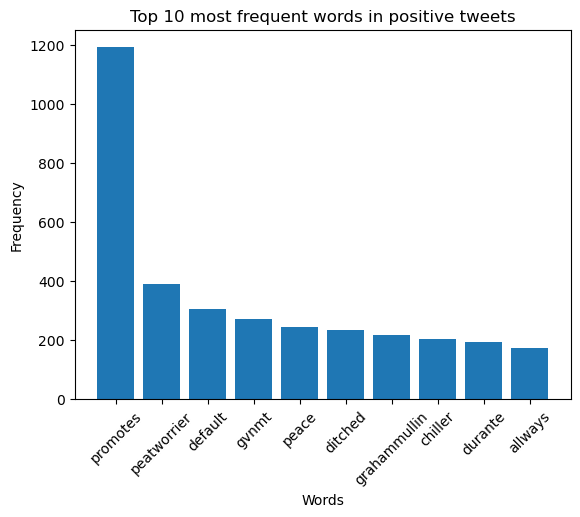

In [31]:
# Plot the top 10 most frequent words in positive tweets
plt.bar([word[0] for word in top_pos_words], [word[1] for word in top_pos_words])
plt.title("Top 10 most frequent words in positive tweets")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

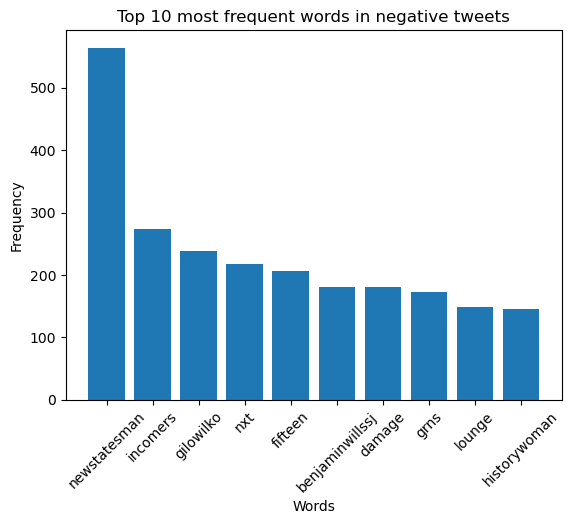

In [32]:
# Plot the top 10 most frequent words in negative tweets
plt.bar([word[0] for word in top_neg_words], [word[1] for word in top_neg_words])
plt.title("Top 10 most frequent words in negative tweets")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

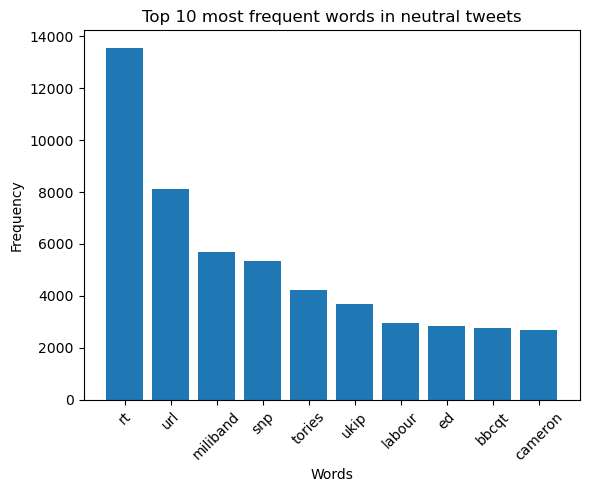

In [33]:
# Plot the top 10 most frequent words in neutral tweets
plt.bar([word[0] for word in top_neutral_words], [word[1] for word in top_neutral_words])
plt.title("Top 10 most frequent words in neutral tweets")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

### 4.Perform part-of-speech (POS) tagging on the preprocessed text data. 

In [34]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

In [35]:
# Define a function to perform POS tagging on a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)
    return pos_tags

##### 4.1.Identify the most common POS tags

In [36]:
# Define a function to get the most common POS tags in a list of sentences
def get_most_common_pos_tags(sentences):
    pos_tags = []
    for sentence in sentences:
        pos_tags += [tag[1] for tag in pos_tag_sentence(sentence)]
    fd = nltk.FreqDist(pos_tags)
    return fd

In [37]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owaise\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [38]:
# Get the most common POS tags for each category
pos_tags_pos = get_most_common_pos_tags(positive_tweets)
pos_tags_neg = get_most_common_pos_tags(negative_tweets)
pos_tags_neutral = get_most_common_pos_tags(neutral_tweets)

In [39]:
print("Top 10 most common POS tags in positive tweets:")
for tag, count in pos_tags_pos.most_common(10):
    print(tag, count)

Top 10 most common POS tags in positive tweets:
NN 13523
NNP 10234
: 8220
JJ 6451
) 5168
PRP 4526
IN 3872
. 3796
DT 3059
RB 3027


In [40]:
print("Top 10 most common POS tags in negative tweets:")
for tag, count in pos_tags_neg.most_common(10):
    print(tag, count)

Top 10 most common POS tags in negative tweets:
NN 11406
( 7077
: 7056
NNP 6627
JJ 5806
PRP 4656
RB 4228
IN 3361
VB 2959
VBP 2925


In [41]:
print("Top 10 most common POS tags in neutral tweets:")
for tag, count in pos_tags_neutral.most_common(10):
    print(tag, count)

Top 10 most common POS tags in neutral tweets:
NNP 106551
NN 76241
IN 35838
: 29424
JJ 25286
DT 24221
RB 18207
VB 17929
PRP 17387
. 16756


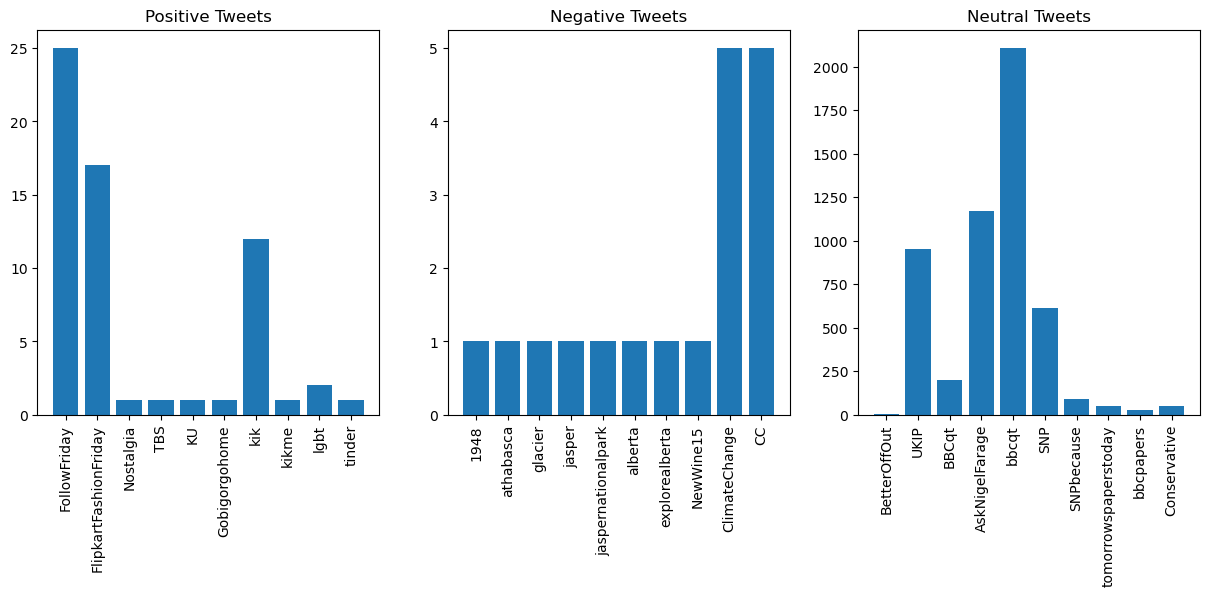

In [42]:
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 10 most common POS tags for each category

axs[0].set_title("Positive Tweets")
axs[0].bar(list(fd_pos.keys())[:10], list(fd_pos.values())[:10])
axs[0].tick_params(axis='x', labelrotation=90)

axs[1].set_title("Negative Tweets")
axs[1].bar(list(fd_neg.keys())[:10], list(fd_neg.values())[:10])
axs[1].tick_params(axis='x', labelrotation=90)

axs[2].set_title("Neutral Tweets")
axs[2].bar(list(fd_neutral.keys())[:10], list(fd_neutral.values())[:10])
axs[2].tick_params(axis='x', labelrotation=90)

plt.show()


#### 5.Use n-grams to identify common phrases

In [43]:
from nltk.util import ngrams
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

In [44]:
# Define the pre-processing functions
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [45]:
# Define the n-gram analysis function
def get_ngrams(tokens, n):
    return ngrams(tokens, n)

In [46]:
# Define the function to get the top 10 most frequent n-grams
def get_top_ngrams(ngrams_list, n):
    freq_dist = Counter(ngrams_list)
    return freq_dist.most_common(10)

In [47]:
# Perform n-gram analysis and frequency counting for positive, negative, and neutral tweets
unigrams_pos = []
bigrams_pos = []
trigrams_pos = []
unigrams_neg = []
bigrams_neg = []
trigrams_neg = []
unigrams_neutral = []
bigrams_neutral = []
trigrams_neutral = []

positive_tokens = [preprocess_tweet(tweet) for tweet in positive_tweets]
negative_tokens = [preprocess_tweet(tweet) for tweet in negative_tweets]
neutral_tokens  = [preprocess_tweet(tweet) for tweet in neutral_tweets]

In [49]:
for tweet in positive_tweets[:500]:
    unigrams_pos.extend(get_ngrams(positive_tokens, 1))
    bigrams_pos.extend(get_ngrams(positive_tokens, 2))
    trigrams_pos.extend(get_ngrams(positive_tokens, 3))

In [50]:
for tweet in negative_tweets[:500]:
    unigrams_neg.extend(get_ngrams(negative_tokens, 1))
    bigrams_neg.extend(get_ngrams(negative_tokens, 2))
    trigrams_neg.extend(get_ngrams(negative_tokens, 3))

In [51]:
for tweet in neutral_tweets[:500]:
    unigrams_neutral.extend(get_ngrams(neutral_tokens, 1))
    bigrams_neutral.extend(get_ngrams(neutral_tokens, 2))
    trigrams_neutral.extend(get_ngrams(neutral_tokens, 3))

In [52]:
"""
FOR RUNNING THE ABOVE LOOPS ON FULL CAPACIY. (8 GB RAM)

---------------------------------------------------------------------------
MemoryError                               Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_7268\1863691624.py in 
      1 for tweet in neutral_tweets[:4500]:
----> 2     unigrams_neutral.extend(get_ngrams(neutral_tokens, 1))
      3     bigrams_neutral.extend(get_ngrams(neutral_tokens, 2))
      4     trigrams_neutral.extend(get_ngrams(neutral_tokens, 3))

MemoryError: 
"""

'\n---------------------------------------------------------------------------\nMemoryError                               Traceback (most recent call last)\n~\\AppData\\Local\\Temp\\ipykernel_7268\x01863691624.py in \n      1 for tweet in neutral_tweets[:4500]:\n----> 2     unigrams_neutral.extend(get_ngrams(neutral_tokens, 1))\n      3     bigrams_neutral.extend(get_ngrams(neutral_tokens, 2))\n      4     trigrams_neutral.extend(get_ngrams(neutral_tokens, 3))\n\nMemoryError: \n'

In [59]:
# Sort n-grams by frequency in descending order
unigram_counts_pos = Counter(unigrams_pos)
unigram_counts_neg = Counter(unigrams_neg)
unigram_counts_neutral = Counter(unigrams_neutral)
bigram_counts_pos = Counter(bigrams_pos)
bigram_counts_neg = Counter(bigrams_neg)
bigram_counts_neutral = Counter(bigrams_neutral)
trigram_counts_pos = Counter(trigrams_pos)
trigram_counts_neg = Counter(trigrams_neg)
trigram_counts_neutral = Counter(trigrams_neutral)

TypeError: unhashable type: 'list'

In [61]:
import itertools

In [62]:
# Flatten lists of n-grams into single list of strings
unigrams_pos_flat = list(itertools.chain(*unigrams_pos))
bigrams_pos_flat = list(itertools.chain(*bigrams_pos))
trigrams_pos_flat = list(itertools.chain(*trigrams_pos))
unigrams_neg_flat = list(itertools.chain(*unigrams_neg))
bigrams_neg_flat = list(itertools.chain(*bigrams_neg))
trigrams_neg_flat = list(itertools.chain(*trigrams_neg))
unigrams_neutral_flat = list(itertools.chain(*unigrams_neutral))
bigrams_neutral_flat = list(itertools.chain(*bigrams_neutral))
trigrams_neutral_flat = list(itertools.chain(*trigrams_neutral))


In [67]:
unigrams_pos_flat = [gram for sublist in unigrams_pos for gram in sublist]
bigrams_pos_flat = [gram for sublist in bigrams_pos for gram in sublist]
trigrams_pos_flat = [gram for sublist in trigrams_pos for gram in sublist]
unigrams_neg_flat = [gram for sublist in unigrams_neg for gram in sublist]
bigrams_neg_flat = [gram for sublist in bigrams_neg for gram in sublist]
trigrams_neg_flat = [gram for sublist in trigrams_neg for gram in sublist]
unigrams_neutral_flat = [gram for sublist in unigrams_neutral for gram in sublist]
bigrams_neutral_flat = [gram for sublist in bigrams_neutral for gram in sublist]
trigrams_neutral_flat = [gram for sublist in trigrams_neutral for gram in sublist]


In [107]:
trigrams_neutral_flat

[['rt',
  'kirkkus',
  'indirect',
  'cost',
  'uk',
  'eu',
  'estimated',
  'costing',
  'britain',
  'billion',
  'per',
  'year',
  'betteroffout',
  'ukip'],
 ['video', 'sturgeon', 'deals', 'url'],
 ['rt',
  'laboureoin',
  'economy',
  'growing',
  'times',
  'faster',
  'day',
  'david',
  'cameron',
  'became',
  'prime',
  'minister',
  'today',
  'bbcqt',
  'url'],
 ['video', 'sturgeon', 'deals', 'url'],
 ['rt',
  'laboureoin',
  'economy',
  'growing',
  'times',
  'faster',
  'day',
  'david',
  'cameron',
  'became',
  'prime',
  'minister',
  'today',
  'bbcqt',
  'url'],
 ['rt',
  'greglauder',
  'ukip',
  'east',
  'lothian',
  'candidate',
  'looks',
  'still',
  'msn',
  'addy',
  'url'],
 ['rt',
  'laboureoin',
  'economy',
  'growing',
  'times',
  'faster',
  'day',
  'david',
  'cameron',
  'became',
  'prime',
  'minister',
  'today',
  'bbcqt',
  'url'],
 ['rt',
  'greglauder',
  'ukip',
  'east',
  'lothian',
  'candidate',
  'looks',
  'still',
  'msn',
  'add

In [97]:
unigram_counts_pos = Counter(tuple(x) for x in unigrams_pos_flat)
bigram_counts_pos = Counter(tuple(x) for x in bigrams_pos_flat)
trigram_counts_pos = Counter(tuple(x) for x in trigrams_pos_flat)

unigram_counts_neg = Counter(tuple(x) for x in unigrams_neg_flat)
bigram_counts_neg = Counter(tuple(x) for x in bigrams_neg_flat)
trigram_counts_neg = Counter(tuple(x) for x in trigrams_neg_flat)

unigram_counts_neutral = Counter(tuple(x) for x in unigrams_neutral_flat)
bigram_counts_neutral = Counter(tuple(x) for x in bigrams_neutral_flat)
trigram_counts_neutral = Counter(tuple(x) for x in trigrams_neutral_flat)

In [105]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_top_ngrams(ngrams_counter, category):
    if isinstance(ngrams_counter, dict):
        ngrams_counter = Counter(ngrams_counter)
    top_ngrams = ngrams_counter.most_common(10)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh([ng[0] for ng in top_ngrams], [ng[1] for ng in top_ngrams])
    ax.set_yticklabels([str(ng[0]) for ng in top_ngrams])
    ax.set_title(f"Top 10 N-grams - {category}")
    plt.show()


TypeError: 'value' must be an instance of str or bytes, not a tuple

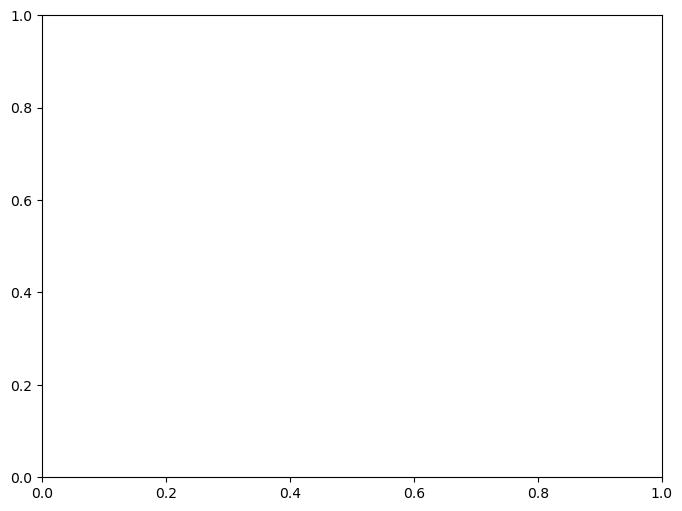

In [106]:
plot_top_ngrams(unigram_counts_pos, "Positive Unigrams")
plot_top_ngrams(bigram_counts_pos, "Positive Bigrams")
plot_top_ngrams(trigram_counts_pos, "Positive Trigrams")

plot_top_ngrams(unigram_counts_neutral, "Neutral Unigrams")
plot_top_ngrams(bigram_counts_neutral, "Neutral Bigrams")
plot_top_ngrams(trigram_counts_neutral, "Neutral Trigrams")

plot_top_ngrams(unigram_counts_neg, "Negative Unigrams")
plot_top_ngrams(bigram_counts_neg, "Negative Bigrams")
plot_top_ngrams(trigram_counts_neg, "Negative Trigrams")
